In [1]:
import cv2
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

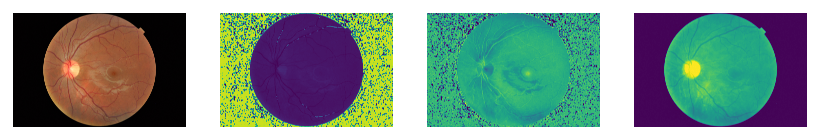

In [2]:
image = cv2.imread('../dataset/kaggle_train/10727_left.jpeg') #dataset/kaggle_train/10727_right.jpeg, dataset/kaggle_train/10727_left.jpeg
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
plt.figure()
fig, ax = plt.subplots(1, 4, figsize=(8,8), dpi=128)
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[1].imshow(h)
ax[2].imshow(s)
ax[3].imshow(v)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
plt.savefig('hsv.png')

In [3]:
import numpy as np
Snr =  np.array([0.111842,  0.064903,  0.338188, -0.606858])
Blur = np.array([0.111842, -0.038357,    0.172200, -0.072340])
Contrast = np.array([0.064903, -0.038357, -0.714696, -0.097839])
Brightness = np.array([0.338188,  0.172200, -0.714696, -0.230695])
Brisque =    np.array([-0.606858, -0.072340, -0.097839,   -0.230695])

# importing package
import matplotlib.pyplot as plt
import pandas as pd
from mycolorpy import colorlist as mcp
# create data
df = pd.DataFrame([ ['SNR', 0, 0.111842,  0.064903,  0.338188, -0.606858], 
                    ['BLUR', 0.111842, 0,-0.038357,    0.172200, -0.072340], 
                    ['CONTRAST', 0.064903, -0.038357, 0,-0.714696, -0.097839],
                    ['BRIGHTNESS', 0.338188,  0.172200, -0.714696, 0,-0.230695],
                    ['BRISQUE', -0.606858, -0.072340, -0.097839,   -0.230695, 0]],
                  columns=['', 'SNR', 'BLUR', 'CONTRAST', 'BRIGHTNESS', 'BRISQUE'])
# view data
print(df)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)    
colors = mcp.gen_color(cmap="Oranges",n=20)
# plot grouped bar chart
ax = df.plot(x=0,
        kind='bar',
        stacked=True,
        figsize=(12,10), 
        width=0.5, 
        fontsize=16,
        color={"SNR": colors[3], "BLUR": colors[7], "CONTRAST": colors[11], "BRIGHTNESS": colors[15], "BRISQUE": colors[19]},
        edgecolor='black'
        )
plt.style.use('seaborn-dark')
plt.grid(color='gray', linestyle='--', linewidth=0.8)
# for p in ax.patches:
#     ax.annotate(str(np.round(p.get_height()*100, 2)), (p.get_x() + 0.52, p.get_height() * 1.005), fontsize=16, color='black', fontweight='bold')
ax.legend(loc='best', prop={'size': 16})
ax.set_ylabel('Correlation coefficients', fontsize=24, fontweight='bold')
ax.set_xlabel('Features', fontsize=24, fontweight='bold', labelpad=15)
ax.set_ylim([-1.05, 1])

plt.show()

                    SNR      BLUR  CONTRAST  BRIGHTNESS   BRISQUE
0         SNR  0.000000  0.111842  0.064903    0.338188 -0.606858
1        BLUR  0.111842  0.000000 -0.038357    0.172200 -0.072340
2    CONTRAST  0.064903 -0.038357  0.000000   -0.714696 -0.097839
3  BRIGHTNESS  0.338188  0.172200 -0.714696    0.000000 -0.230695
4     BRISQUE -0.606858 -0.072340 -0.097839   -0.230695  0.000000


NameError: name 'matplotlib' is not defined

In [ ]:
import matplotlib
label0 = np.array([
    0.286915417102561, 
    0.287760949652067, 
    0.29875283446712, 
    0.253150057273769, 
    0.285310734463277])
label1 = np.array([
    0.713084582897439,
    0.712239050347933,
    0.70124716553288,
    0.746849942726231,
    0.714689265536723,
])

labels = ['DR0', 'DR1', 'DR2', 'DR3', 'DR4']

width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(12,10))

ax.bar(labels, label0*100, width, label='Low quality', color=colors[6], edgecolor='black')
ax.bar(labels, label1*100, width,  bottom=label0*100, label='High quality', color=colors[15], edgecolor='black')

ax.set_ylabel('%', fontsize=24, fontweight='bold')
ax.set_xlabel('Diabetic Retinopathy Grading', fontsize=20, fontweight='bold')
ax.legend(loc='upper right', prop={'size': 14})
plt.show()


In [ ]:
import os

def get_filenames(base):
    X0 = []
    Y0 = []
    filename = []
    k = 0
    ext = ('jpg', 'jpeg', 'png', 'tif', 'PNG', 'JPG','JPEG')
    for i in sorted(os.listdir(base)):
        for j in sorted(os.listdir(os.path.join(base, i))):
            if j.endswith(ext):
                    X0.append(os.path.join(base, i, j))
                    filename.append(j)
                    Y0.append(int(i))
    return X0,Y0, filename

X0, Y0, filenames = get_filenames('../dataset/D2/val')

path = '../csv/kaggle_new_label.csv'
csv1 = pd.read_csv(path)
csv1 = csv1.sample(frac=1).reset_index(drop=True)
files = csv1['File'].to_list()
SNR = csv1['SNR'].to_numpy()
BLUR = csv1['Blur'].to_numpy()
CONTRAST = csv1['Contrast'].to_numpy()
BRISQUE = csv1['Brisque'].to_numpy()
BRIGHT = csv1['Brightness'].to_numpy()
LABEL = csv1['Qlabel'].to_numpy()
DR = csv1['DR'].to_numpy()

DR1 = []
LABEL1 = []
x = set(files) & set(filenames)

for n, i in enumerate(x):
    idx = files.index(i)
    DR1.append(DR[idx])
X1 = []
Y1 = []
for n, i in enumerate(x):
    idx = filenames.index(i)
    X1.append(X0[idx])
    Y1.append(Y0[idx])


In [ ]:
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import pandas as pd
import seaborn as sns
from torchvision import datasets, transforms
import os
import torch
from PIL import Image

def predict(model, img_file, img_size):
    img_orig = Image.open(img_file)
    img = img_orig.resize((img_size, img_size))
    img = np.array(img) / 255.
    image = img.transpose(2, 0, 1)
    image = np.expand_dims(image, axis=0)
    image = torch.tensor(image, device='cuda', dtype=torch.float)
    pred = model(image)
    pred = torch.softmax(pred, dim=1)
    pred = torch.argmax(pred).detach().cpu().numpy().item()
    return pred

model = torch.load('../logs/version4/checkpoints/model.pth')
pred = []
for img_file in tqdm(x):
    pred.append(predict(model, os.path.join('../dataset/D2/only1/0/', img_file), 224))
print(pred)


In [ ]:
dr0_true = []
dr1_true = []
dr2_true = []
dr3_true = []
dr4_true = []

dr0_pred = []
dr1_pred = []
dr2_pred = []
dr3_pred = []
dr4_pred = []

for idx, (y1, ldr) in enumerate(zip(Y1, DR1)):
    if ldr == 0:
        dr0_true.append(y1)
        dr0_pred.append(pred[idx])
    if ldr == 1:
        dr1_true.append(y1)
        dr1_pred.append(pred[idx])
    if ldr == 2:
        dr2_true.append(y1)
        dr2_pred.append(pred[idx])
    if ldr == 3:
        dr3_true.append(y1)
        dr3_pred.append(pred[idx])
    if ldr == 4:
        dr4_true.append(y1)
        dr4_pred.append(pred[idx])
    
print(len(dr0_true), len(dr1_true), len(dr2_true), len(dr3_true), len(dr4_true))
print(len(dr0_pred), len(dr1_pred), len(dr2_pred), len(dr3_pred), len(dr4_pred))

In [ ]:
def cfs_matrix(y_true, y_pred, title):
    cf_matrix = confusion_matrix(y_true, y_pred)

    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()
                    ]

    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}"for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cf_matrix, annot=labels, annot_kws={"size": 22}, cmap='Oranges', fmt='')
    ax.xaxis.set_ticklabels(['Low Quality', 'High Quality'], fontsize=22)
    ax.yaxis.set_ticklabels(['Low Quality', 'High Quality'], fontsize=22)
    ax.set_xlabel('CNN label', fontsize=22, fontweight="bold")
    ax.set_ylabel('Human Opinion', fontsize=22, fontweight="bold")
    ax.set_title(title, fontsize=24, fontweight="bold")
cfs_matrix(dr0_true, dr0_pred, 'DR0')
cfs_matrix(dr1_true, dr1_pred, 'DR1')
cfs_matrix(dr2_true, dr2_pred, 'DR2')
cfs_matrix(dr3_true, dr3_pred, 'DR3')
cfs_matrix(dr4_true, dr4_pred, 'DR4')